#**Enunciado**

## **Optimización de campañas de marketing online**

* Lo que se pretende con este caso es asentar los conceptos relativos al algoritmo del bandido multibrazo, como son las ratios de explotación y exploración para la optimización de una campaña de marketing online.

* Se tiene que hacer una campaña de marketing online para promocionar un determinado producto con la que se mostrará en una página web un banner con una imagen del producto que promocionar.

* Se han realizado cinco imágenes distintas del producto para poner en el banner con el objetivo de captar la atención del usuario para que pulse en el banner y acceda a la web con los detalles del producto a promocionar, siendo la imagen la que mayor valor de Q tenga calculado a partir de la siguiente fórmula:


$$Q(imagen_i) = \frac{Nº Clicks}{Nº impresiones de la pagina}$$

* Sin saber a priori cuál es la imagen que captará mayor atención, se debe aprender con base en los clics que se realizan sobre el banner qué imagen será las más llamativa y conseguirá más visitas aplicando el método del bandido multibrazo.

* El objetivo es encontrar la imagen que capte mayor atención de los usuarios, es decir que mayor número de clics obtenga:

* Dado el método ya implementado en el notebook “multi_armed_bandit(num_games=1000, epsilon=0.1, verbose=False)”, se pide, **modificando el valor de épsilon**, responder a la siguientes preguntas para asentar los conceptos relativos al aprendizaje por refuerzo y, en particular, al algoritmo del bandido multibrazo:

1. ¿Cuáles el valor de épsilon que maximiza la imagen con mayor número de clics?
2. ¿Cuáles la imagen que más clics obtiene y cuántos?
3. Poniendo una ratio de explotación del 100%, ¿Qué resultado se obtiene?



# **Resolución**

In [4]:
# Carga de librerías

import random
import numpy as np
np.set_printoptions(precision=4)

import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
# Definición de función

def multi_armed_bandit(num_games=1000, epsilon=0.1, verbose=False):

    bandits = [0.1, 0.6, 0.2, 0.1, 0.3]
    total_reward = 0
    acum_reward_bandit = np.zeros(len(bandits))  # numerador -> Nº Clicks
    num_selected_bandit = np.zeros(len(bandits)) # denominador -> Nº impresionesdelapagina
    q_bandits = np.zeros(len(bandits))            # Q(imageni)

    if verbose:
        print("Initial Bandits Distribution\n  {}".format(bandits))

    for game in range(0,num_games):

        # Hago una copiar de las Q(imagen)
        old_q_bandits = q_bandits.copy()

        if np.random.random() < epsilon:
            bandit = np.random.randint(len(bandits)) # Exploro
        else:
            bandit = np.random.choice(np.flatnonzero(q_bandits == q_bandits.max())) # Exploto

        # Obtengo el reward
        reward = 1 if (np.random.random() < bandits[bandit]) else 0

        # Actualizo reward total
        total_reward += reward

        # Actualizo valor (Q) de la imagen
        acum_reward_bandit[bandit] += reward
        num_selected_bandit[bandit] += 1
        q_bandits[bandit] = acum_reward_bandit[bandit] / num_selected_bandit[bandit]

        if verbose:
            print("\nGAME {game}\n  Old Q_Bandits = {old_q_bandits}\n  Selected Bandit = {bandit} \
                  \n  Reward = {reward}\n  Q_Bandits = {q_bandits}"
                  .format(game=game+1, old_q_bandits=old_q_bandits, bandit=bandit,
                          reward=reward, q_bandits=q_bandits))

    return bandits, total_reward, q_bandits, num_selected_bandit


### Ratio de Exploración EPSILON:


* Modificando la constante "EPSILON" que es el ratio de exploración se pide:


1. Cual es el valor de EPSILON que maximiza la imagen con mayor número de clicks
    + ***RESPUESTA***: El valor de EPSILON que maximiza la imagen con mayor número de clicks es **EPSILON = 0.05**.


2. Cual es la imagen que más clicks obtiene y cuantos:
    + ***RESPUESTA***: La imagen que más clicks obtiene es la **Imagen B** con un número de Clicks que va desde **474 a 555** clicks según el épsilon asociado.


3. Poniendo un ratio de explotación del 100% (exploración al 0%) que resultado obtenemos:
    + ***RESPUESTA***: Con este ratio de exploración a 0 (epsilon a 0) que significa que explotamos el 100% de las veces, vemos que vamos a seleccionar como imagen aquella que primero obtenga un click ya que una vez que esa haya obtenido recompensa siempre mostraremos la misma ya que estaremos explotando la información que tenemos. En este caso sería la **Imagen B** y el número total de clicks serían **603**
    

Epsilon = 0
Initial Bandits Distribution
  [0.1, 0.6, 0.2, 0.1, 0.3]
Bandits Distribution games
  [   0. 1000.    0.    0.    0.]
Q(imagen) Bandits
  [0.    0.603 0.    0.    0.   ]
CLICKS: 603



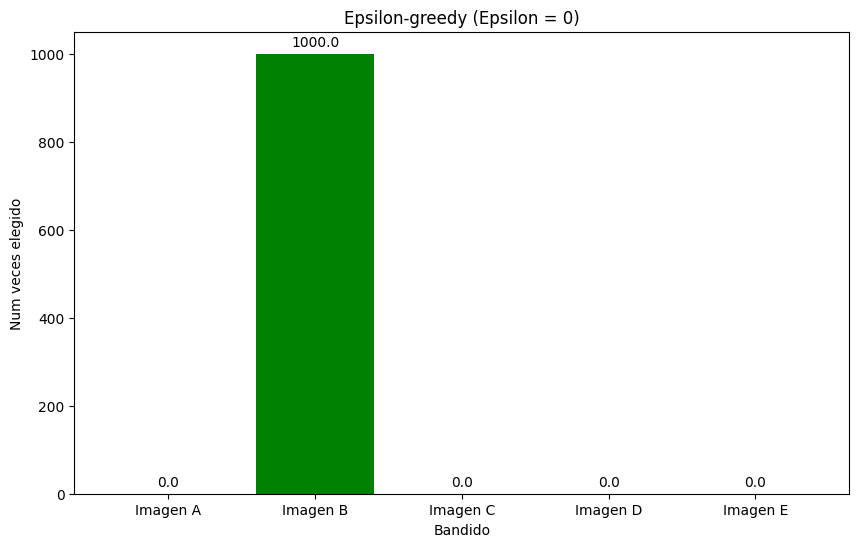

Epsilon = 0.05
Initial Bandits Distribution
  [0.1, 0.6, 0.2, 0.1, 0.3]
Bandits Distribution games
  [ 14. 962.   4.   8.  12.]
Q(imagen) Bandits
  [0.2143 0.5686 0.25   0.125  0.25  ]
CLICKS: 555



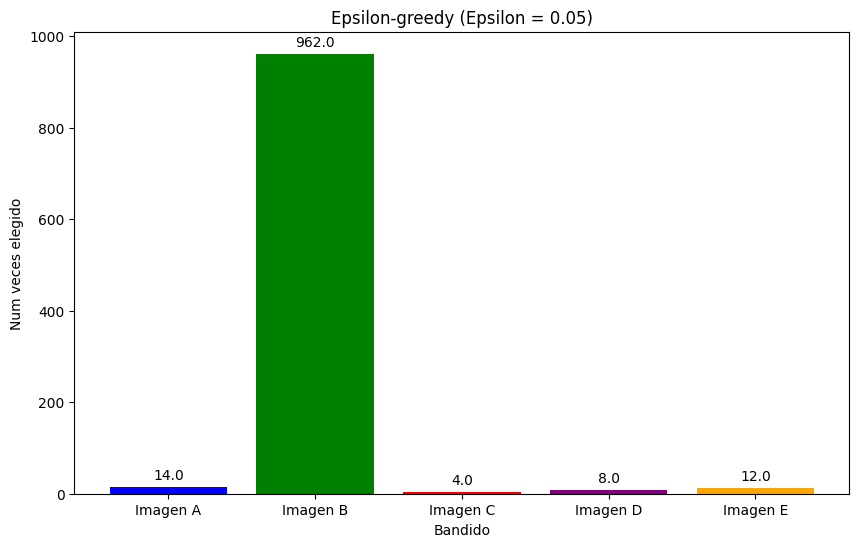

Epsilon = 0.1
Initial Bandits Distribution
  [0.1, 0.6, 0.2, 0.1, 0.3]
Bandits Distribution games
  [ 33. 760. 166.  27.  14.]
Q(imagen) Bandits
  [0.0909 0.5776 0.1687 0.037  0.2143]
CLICKS: 474



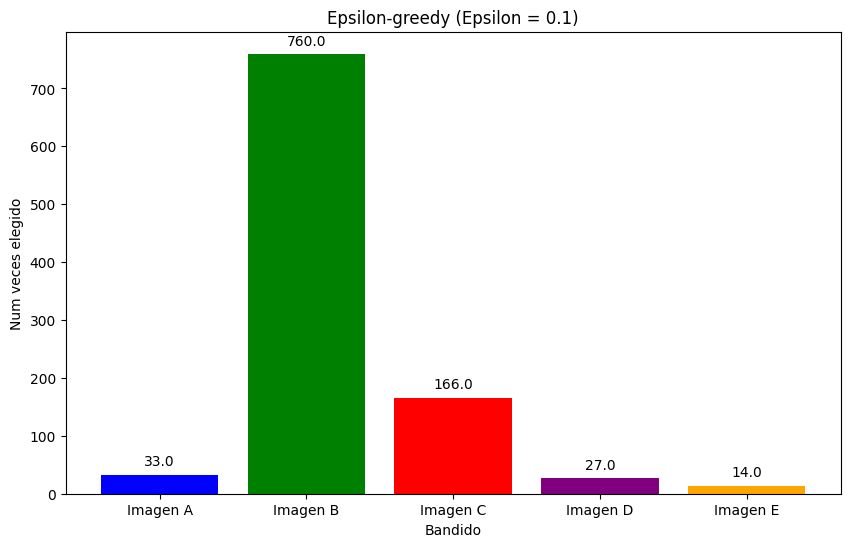

Epsilon = 0.15
Initial Bandits Distribution
  [0.1, 0.6, 0.2, 0.1, 0.3]
Bandits Distribution games
  [ 27. 884.  17.  36.  36.]
Q(imagen) Bandits
  [0.037  0.5803 0.1765 0.0833 0.3056]
CLICKS: 531



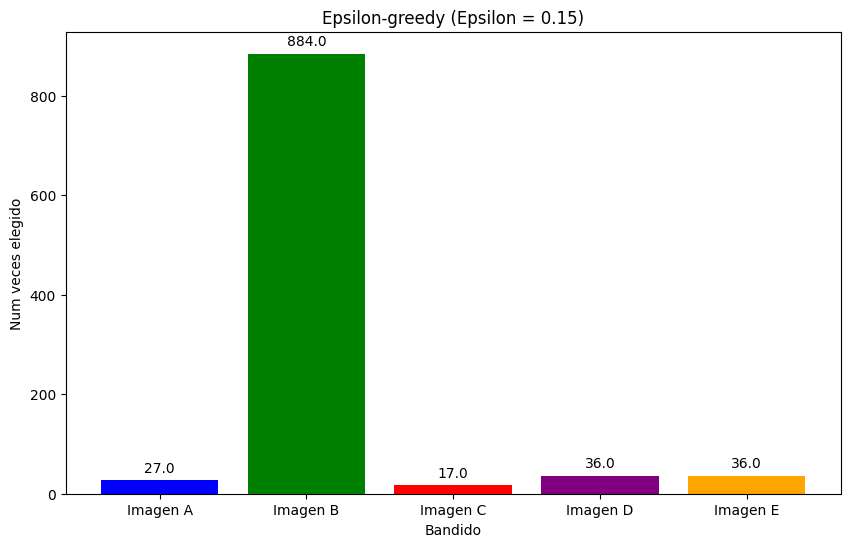

Epsilon = 0.2
Initial Bandits Distribution
  [0.1, 0.6, 0.2, 0.1, 0.3]
Bandits Distribution games
  [ 40. 845.  33.  48.  34.]
Q(imagen) Bandits
  [0.075  0.6166 0.2121 0.0833 0.1471]
CLICKS: 540



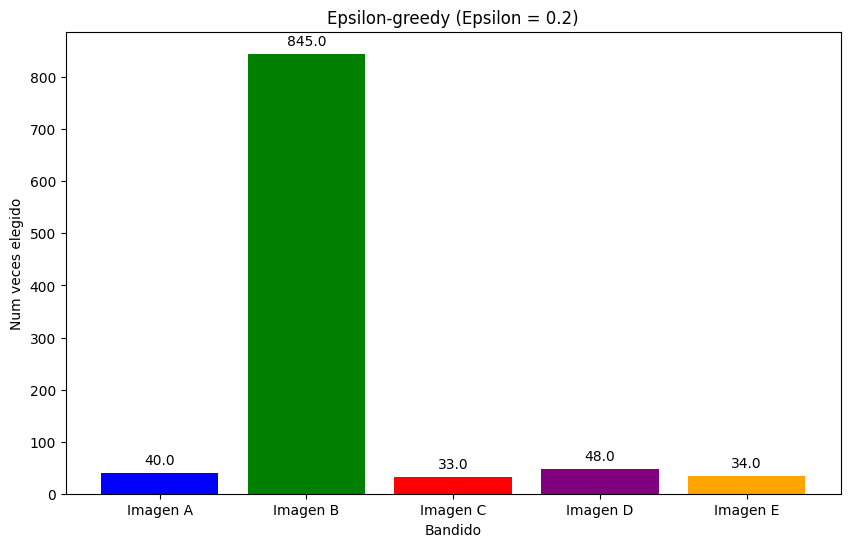

In [31]:
# Defino una función de iteración para distintos valores de Epsilon.

def run_bandit_experiment(epsilon_values, num_games=1000):
    for epsilon in epsilon_values:
        # Ejecutar el experimento del multi-armed bandit
        bandits, total_reward, q_bandits, num_selected_bandit = multi_armed_bandit(
            num_games=num_games,
            epsilon=epsilon,
            verbose=False
        )

        # Imprimir los resultados
        print("Epsilon = {}".format(epsilon))
        print("Initial Bandits Distribution\n  {}".format(bandits))
        print("Bandits Distribution games\n  {}".format(num_selected_bandit))
        print("Q(imagen) Bandits\n  {}".format(q_bandits))
        print("CLICKS: {}".format(total_reward))
        print()

        # Generar el gráfico de barras
        custom_labels = ["Imagen A", "Imagen B", "Imagen C", "Imagen D", "Imagen E"]
        colors = ['blue', 'green', 'red', 'purple', 'orange']
        plt.figure(figsize=(10, 6),)
        plt.title('Epsilon-greedy (Epsilon = {})'.format(epsilon))
        bars = plt.bar(range(0, len(bandits)), num_selected_bandit, color=colors)
        plt.xlabel('Bandido')
        plt.ylabel('Num veces elegido')

        # Establecer las etiquetas personalizadas en el eje x
        plt.xticks(range(len(bandits)), custom_labels)

        # Agregar etiquetas sobre las barras
        for i, label in enumerate(custom_labels):
            height = num_selected_bandit[i]
            plt.text(
                i, height + 10,  # Posición x e y de la etiqueta
                '{}'.format(height),
                ha='center',
                va='bottom',
                fontsize=10
            )
        plt.show()

# Listo los valores de EPSILON
epsilon_values = [0, 0.05, 0.10, 0.15, 0.20]

# Llamo a la función con los valores de EPSILON
run_bandit_experiment(epsilon_values)